### Load all the required libraries

In [1]:
import numpy as np
#Split the training and test dataset
from sklearn.model_selection import train_test_split
#load the sklearn datasets
from sklearn import datasets
#Visualization
import matplotlib.pyplot as plt

### Define the logistic regression

In [2]:
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

### Load the dataset

In [3]:
X,y = datasets.load_iris(return_X_y=True)

### Fit the IRIS dataset

0.98


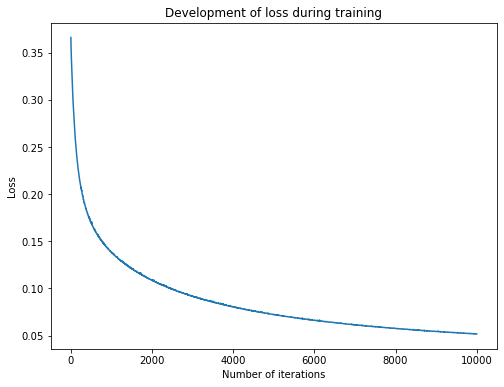

In [4]:
lrModel = MultiClassLogisticRegression(threshold=1e-5)
lrModel.fit(X,y,lr=0.0001)
print(lrModel.score(X, y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lrModel.loss)), lrModel.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

### Fit the model for digits dataset

0.965


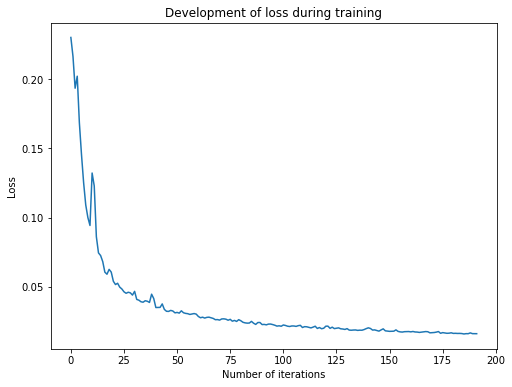

In [5]:
# import some data to play with
digits = datasets.load_digits()
X = digits.data  # we only take the first two features.
Y = digits.target
lrModel = MultiClassLogisticRegression()
lrModel.fit(X,Y, lr=0.0001)

pre = lrModel.predict_classes(X)
print(lrModel.score(X,Y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lrModel.loss)), lrModel.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()